<a href="https://colab.research.google.com/github/Kewal1903/YOLO_from_scratch/blob/main/VOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8NWJgXFUuCkE6hxPRXgZ")
project = rf.workspace("roboflow-100").project("chess-pieces-mjzgj")
version = project.version(2)
dataset = version.download("darknet")

loading Roboflow workspace...
loading Roboflow project...


In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [3]:
!pip install -r requirements.txt


In [4]:
%cd /content/yolov5/data
with open('custom_dataset.yaml', 'w') as f:
    f.write('''
train: /content/chess-pieces-2/train
val: /content/chess-pieces-2/valid

# number of classes
nc: 13

# class names
names: ['class1', 'class2', 'class3', 'class4','class5','class6','class7','class8','class9','class10','class11','class12','class13']
''')
%cd /content/yolov5


/content/yolov5/data
/content/yolov5


In [5]:
!python train.py --img 640 --batch 16 --epochs 50 --data data/custom_dataset.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name yolov5_custom

2024-08-17 11:07:37.600991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 11:07:37.902738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 11:07:37.984657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/custom_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_sc

In [6]:
!python val.py --weights runs/train/yolov5_custom/weights/best.pt --data data/custom_dataset.yaml --img 640


val: data=data/custom_dataset.yaml, weights=['runs/train/yolov5_custom/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-353-g5eca7b9c Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/chess-pieces-2/valid.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/2 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 2.100s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:10<00:00,  5.47s/it]
                   all         58        386

In [7]:
!python detect.py --weights runs/train/yolov5_custom/weights/best.pt --img 640 --conf 0.25 --source /content/chess-pieces-2/valid

detect: weights=['runs/train/yolov5_custom/weights/best.pt'], source=/content/chess-pieces-2/valid, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-353-g5eca7b9c Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/58 /content/chess-pieces-2/valid/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.d95342607d42ef4b59168a2c1f22ef5f.jpg: 448x640 2 class3s, 2 class4s, 5 class5s, 1 class9, 1 class10, 5 class11s, 1 class13, 46.5ms
image 2/58 /content/chess-pieces-2/valid/0b2252c93c53e1b2e61d485b22328e2e_jpg.rf.a997daf5b7b349b

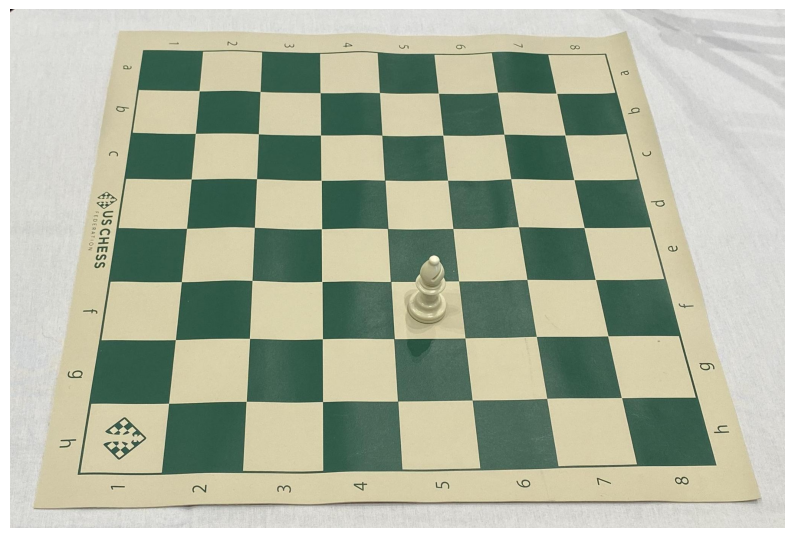

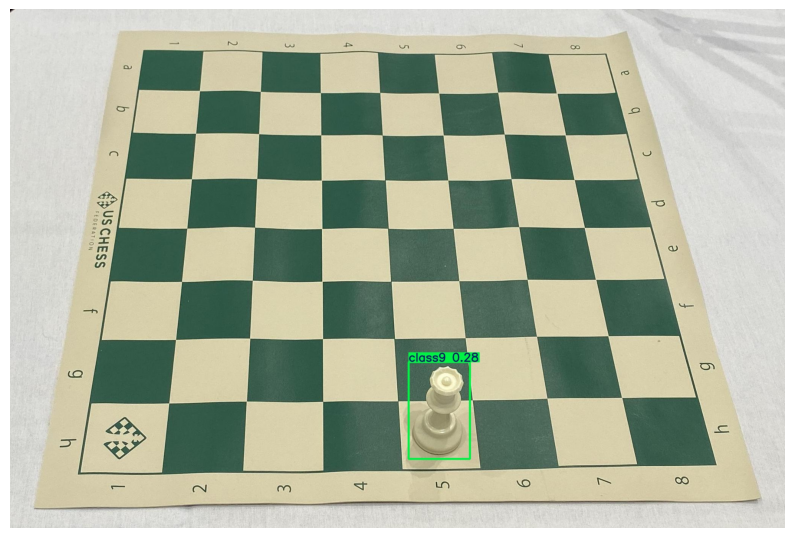

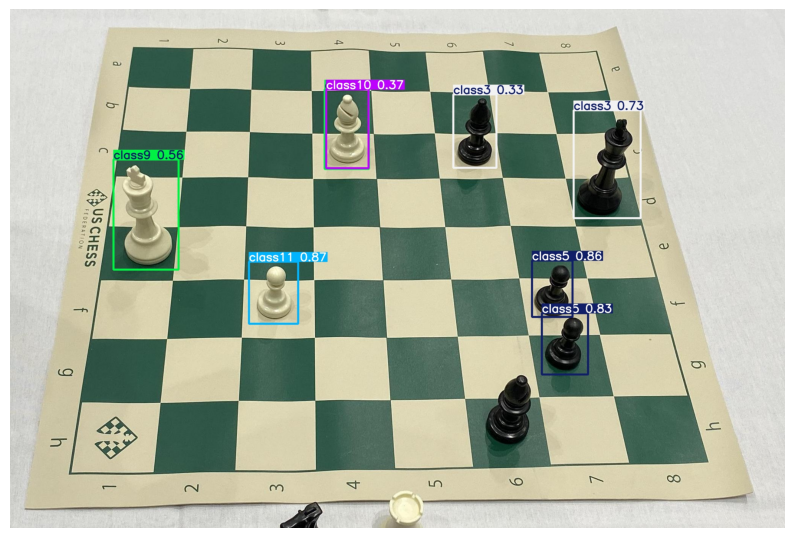

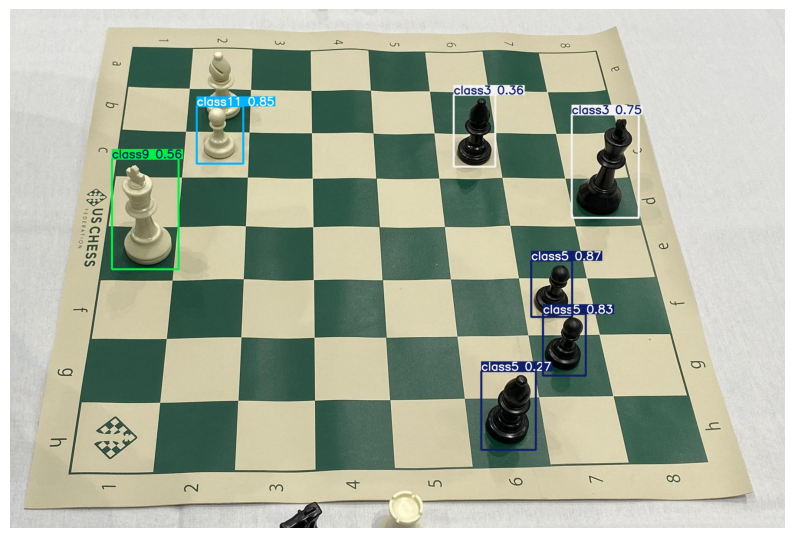

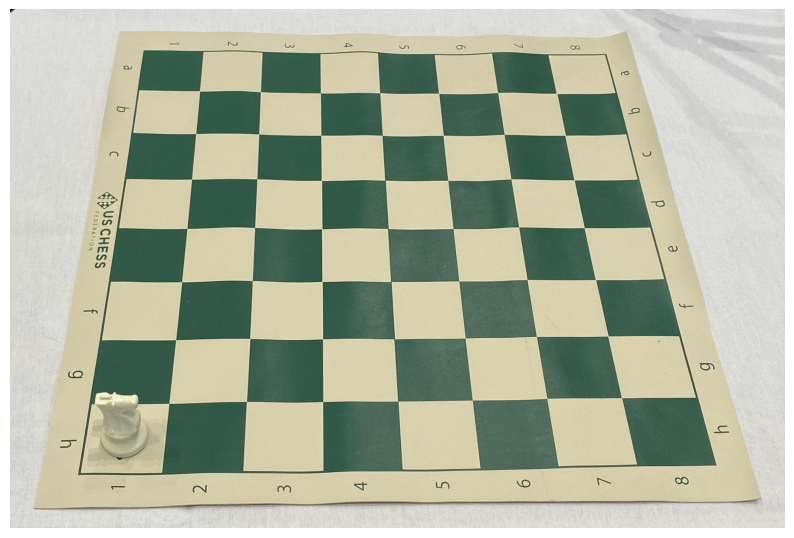

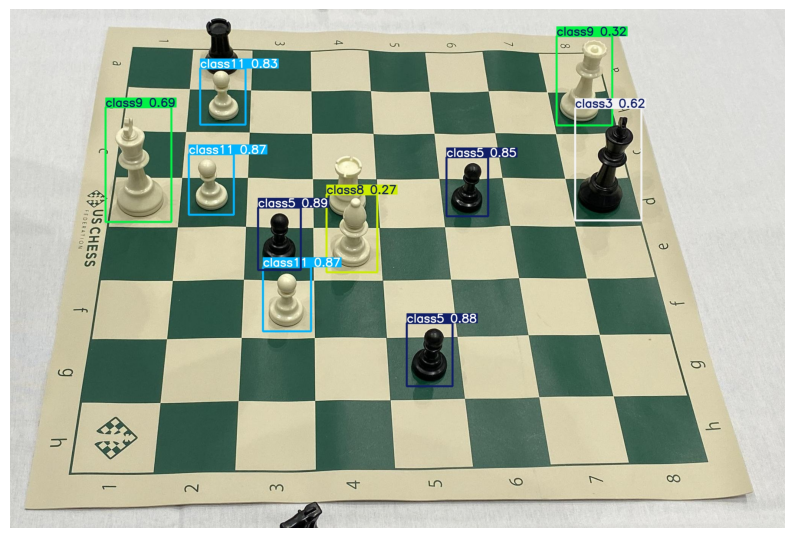

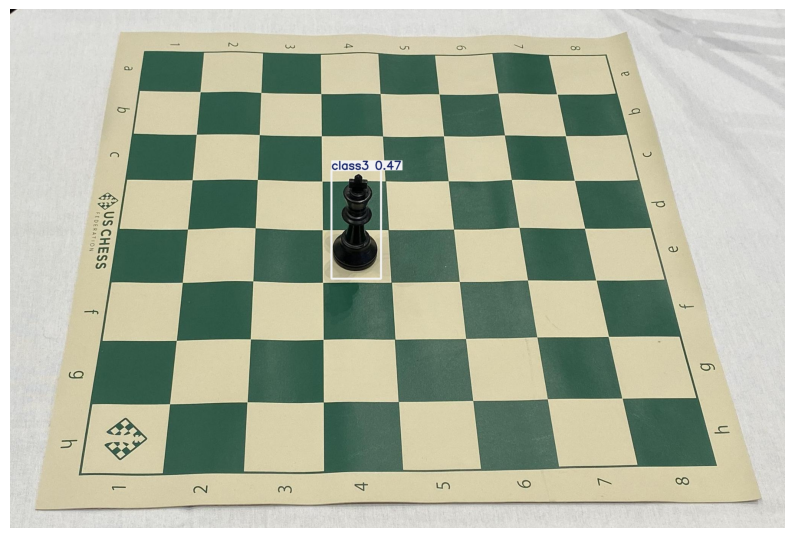

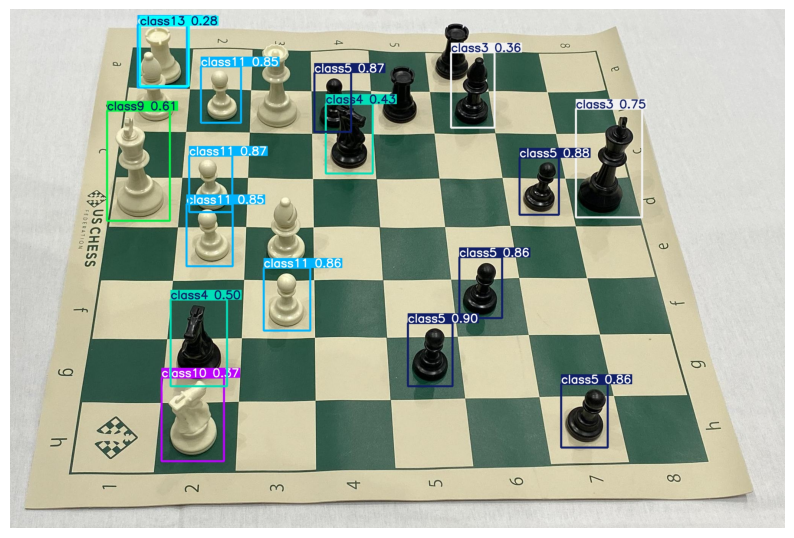

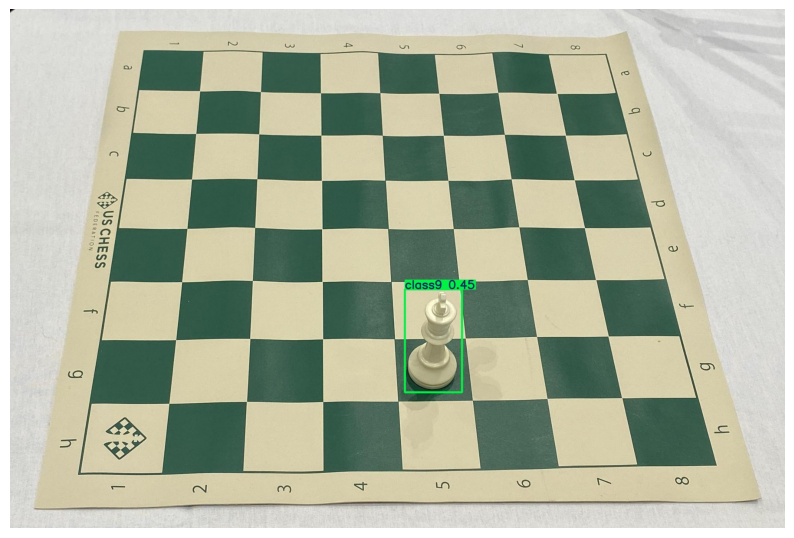

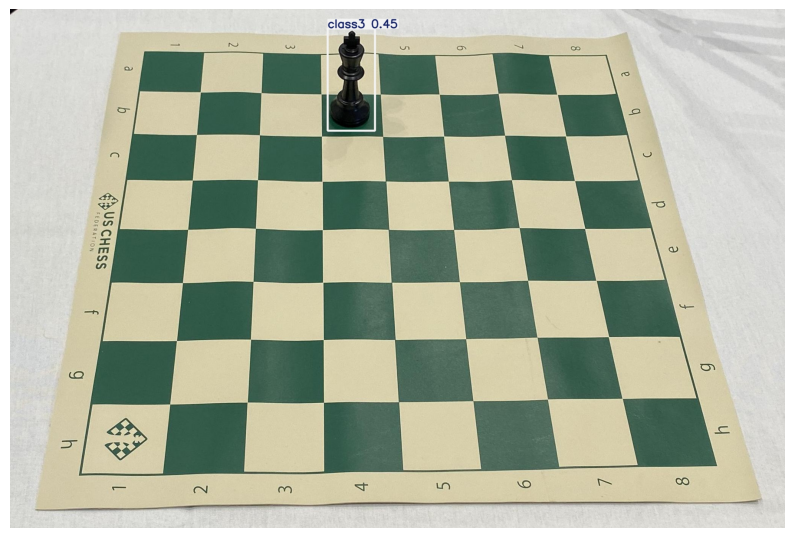

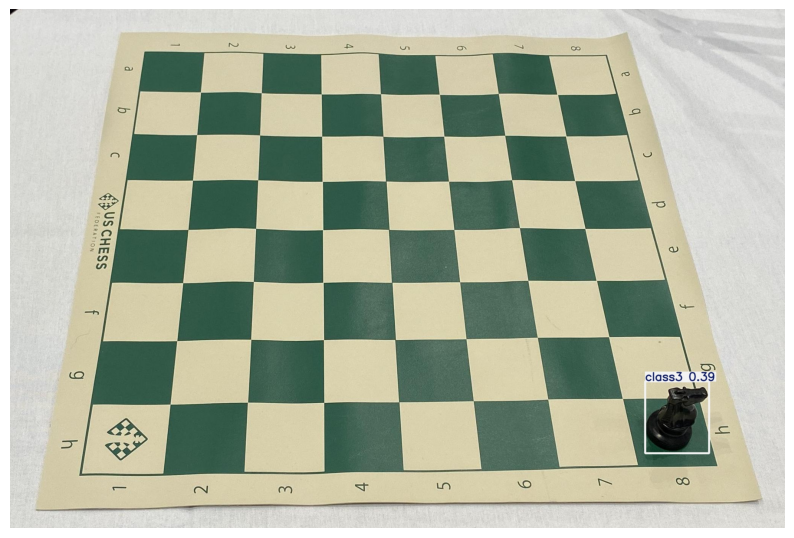

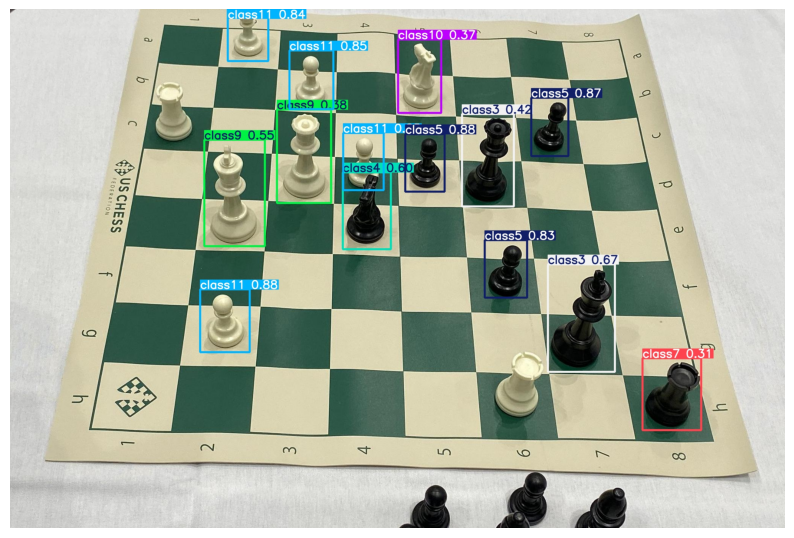

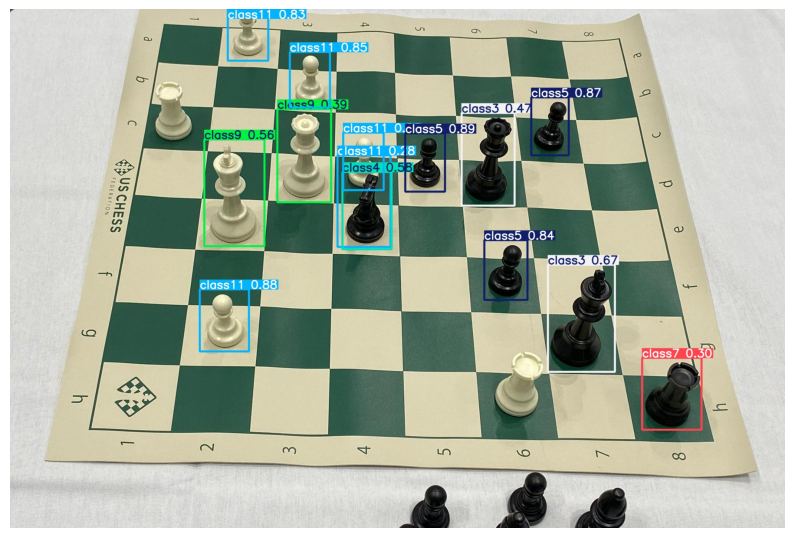

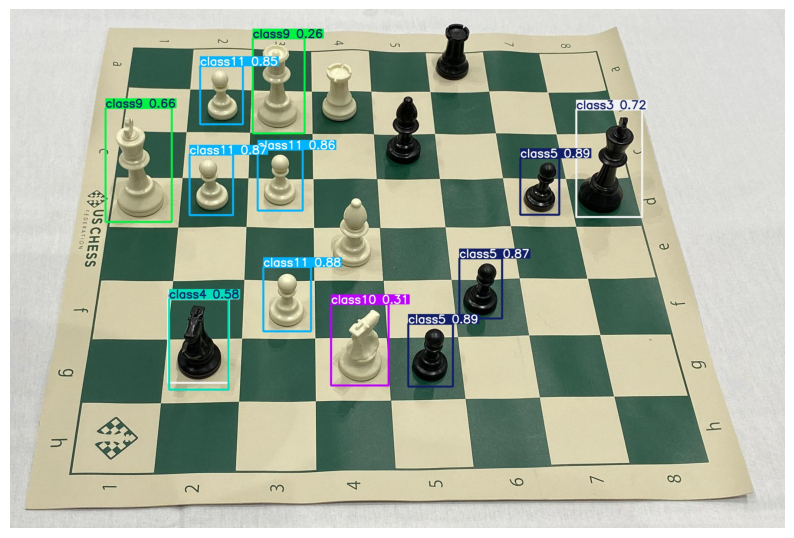

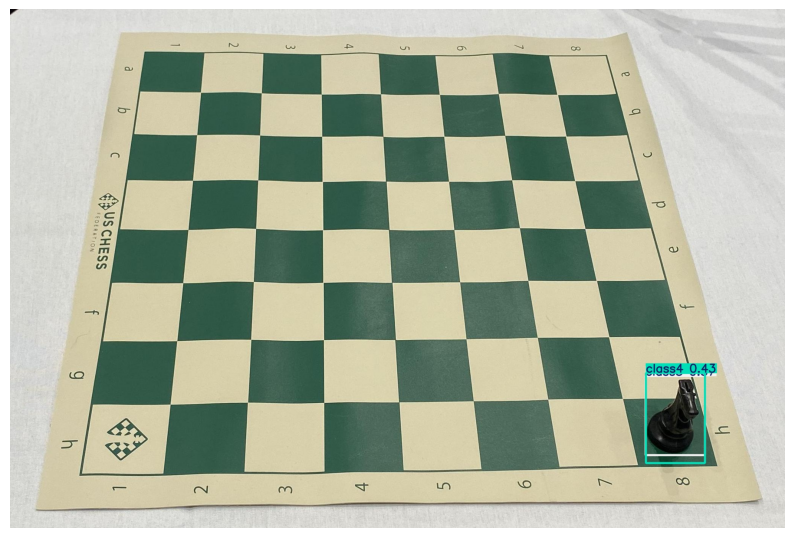

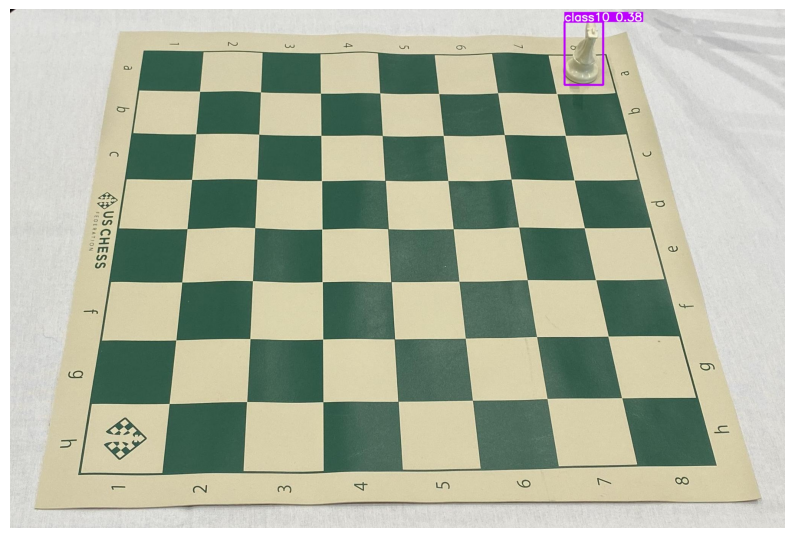

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

output_dir = '/content/yolov5/runs/detect/exp'


output_files = os.listdir(output_dir)


for file in output_files:

    img_path = os.path.join(output_dir, file)
    img = cv2.imread(img_path)


    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()